# Pre-Processing and Modelling
* ## 2.1 Importing Data
* ## 2.2 Unsupervised Learning for Temperature
* ## 2.3 SARIMAX Model with Aggregated Data
* ## 2.4 LSTM with Aggregated Data
* ## 2.5 Multi-Input Parallel LSTM Model
* ## 2.6 Random Forest Regressor
* ## 2.7 Assessing Model Performances

In [1]:
#Load all the necessary packages for the wrangling part of the project
import requests
from pathlib import Path
from eod import EodHistoricalData
from twelvedata import TDClient
import datetime as dt
import pandas as pd
import numpy as np
import numpy.random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, f1_score

import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [3]:
file1 = '../Capstone_Project_3/df_wrangled_1.csv'
file2 = '../Capstone_Project_3/grouped.csv'

In [4]:
df_1 = pd.read_csv(file1, index_col='Unnamed: 0')
df_2 = pd.read_csv(file2)

In [5]:
temp = df_1.groupby('Date')[['Holiday_Flag']].agg('max')
df_2 = df_2.merge(temp, left_on ='time', right_on=temp.index)

In [6]:
df_1.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  2010-02-05    1643690.90             0        42.31       2.572   
1      1  2010-02-12    1641957.44             1        38.51       2.548   
2      1  2010-02-19    1611968.17             0        39.93       2.514   
3      1  2010-02-26    1409727.59             0        46.63       2.561   
4      1  2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  stock_price    sp500  
0  211.096358         8.106     53.45000  1066.19  
1  211.242170         8.106     52.89999  1075.51  
2  211.289143         8.106     53.49001  1109.17  
3  211.319643         8.106     54.07001  1104.49  
4  211.350143         8.106     54.14000  1138.69

In [7]:
df_2.head()

time  Weekly_Sales   Walmart    sp500  Temperature  Fuel_Price  \
0  2010-02-05   49750740.50  53.45000  1066.19    34.037333    2.717844   
1  2010-02-12   48336677.63  52.89999  1075.51    34.151333    2.694022   
2  2010-02-19   48276993.78  53.49001  1109.17    37.719778    2.672067   
3  2010-02-26   43968571.13  54.07001  1104.49    39.243556    2.683933   
4  2010-03-05   46871470.30  54.14000  1138.69    42.917333    2.731200   

          CPI  Unemployment  Holiday_Flag  
0  167.730885      8.619311             0  
1  167.825608      8.619311             1  
2  167.871686      8.619311             0  
3  167.909657      8.619311             0  
4  167.947628      8.619311             0

In [8]:
#1. Unsupervised to see what cluster each store is in.
#- Could do different models for different stores
#2. Time series - ARIMA Model
#3. Long short term memories

## 2.2 Unsupervised Learning for Temperature and Fuel Price

#### One of the problems we have for this study is that we cannot make a model for every single store, since we do not have enough data to do that. In that case, we could use temperature and fuel price to conduct an unsupervised learning method to differentiate the stores based on temperature and fuel price. The reason for that is we want in an approximate geological location, the temperature and the gas price may be consistent throughotu the region.

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
#We first get the average temp for each year for each state, and make them into variables
df_1['year'] = pd.DatetimeIndex(df_1['Date']).year

In [107]:
t1 = df_1.groupby(['Store']).agg({'Temperature':'mean', 'Fuel_Price':'mean'})
t2 = df_1.groupby(['Store','year']).agg({'Temperature':'mean', 'Fuel_Price':'mean'})

The smaller the value of SS is, the better the clustering, which indicates smaller error.


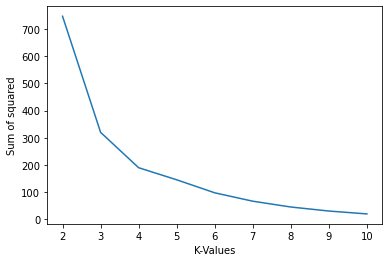

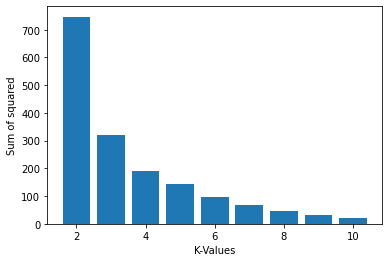

In [108]:
from sklearn.cluster import KMeans
import sklearn.cluster
print('The smaller the value of SS is, the better the clustering, which indicates smaller error.')
ss1 = []
ss2 = []
x_cols = t1.to_numpy()
ks = [i for i in range(2,11,1)]

for i in ks:
    model = KMeans(n_clusters=i)
    model.fit(x_cols)
    pred = model.predict(x_cols)   
    ss1.append(model.inertia_)
    
    centers = model.cluster_centers_
    ss2.append(np.sum((x_cols - centers[pred]) ** 2))

_ = plt.figure()
_ = plt.plot(ks, ss1)
_ = plt.xlabel('K-Values')
_ = plt.ylabel('Sum of squared')

_ = plt.figure()
_ = plt.bar(ks, ss2)
_ = plt.xlabel('K-Values')
_ = plt.ylabel('Sum of squared')

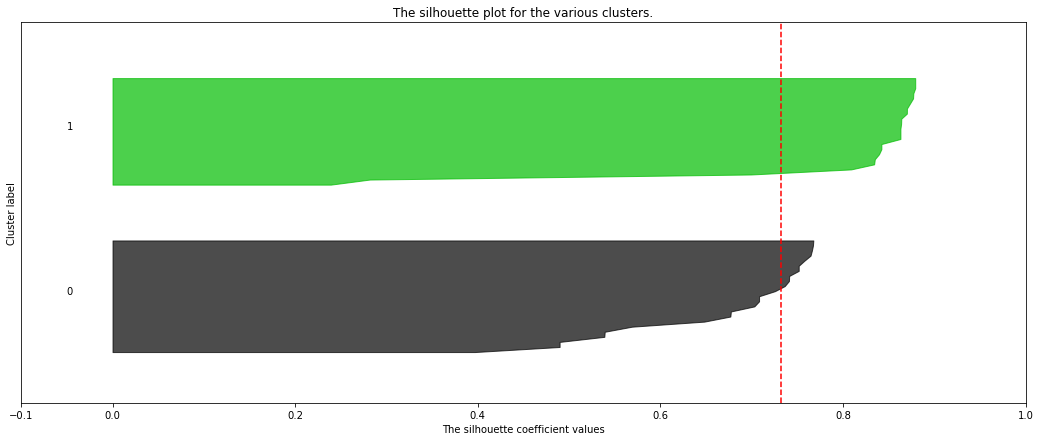

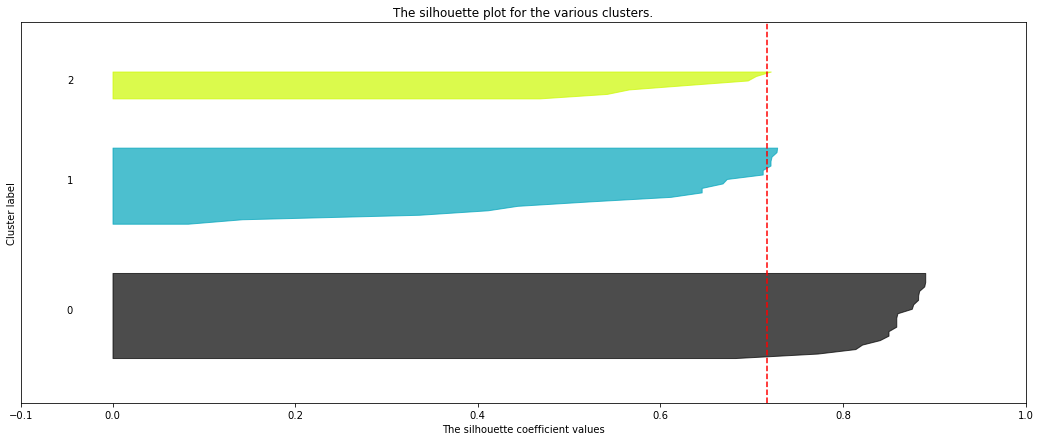

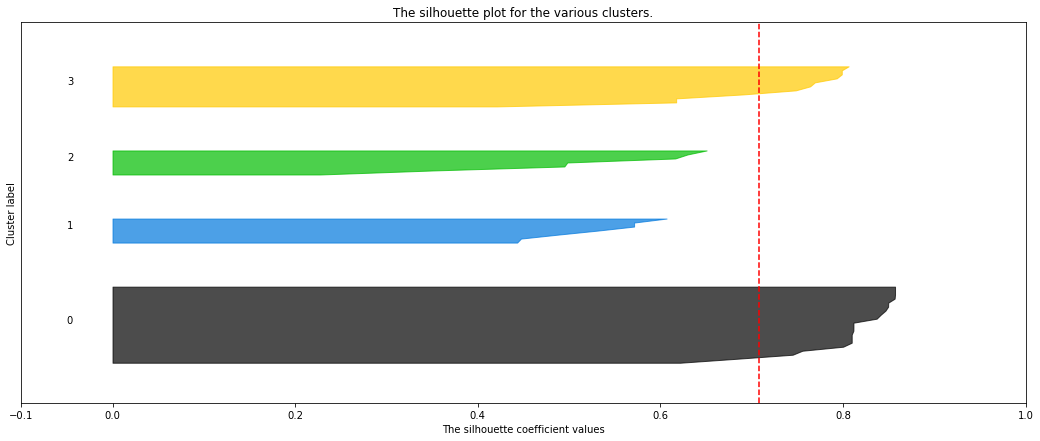

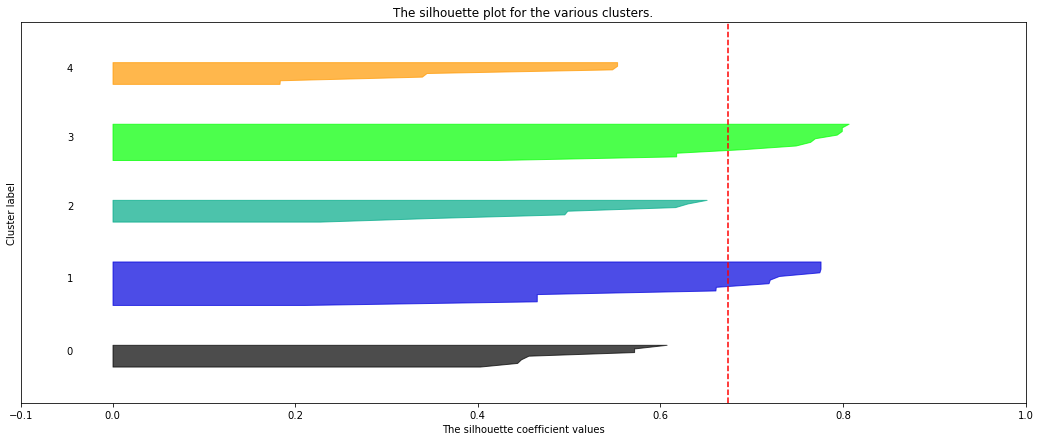

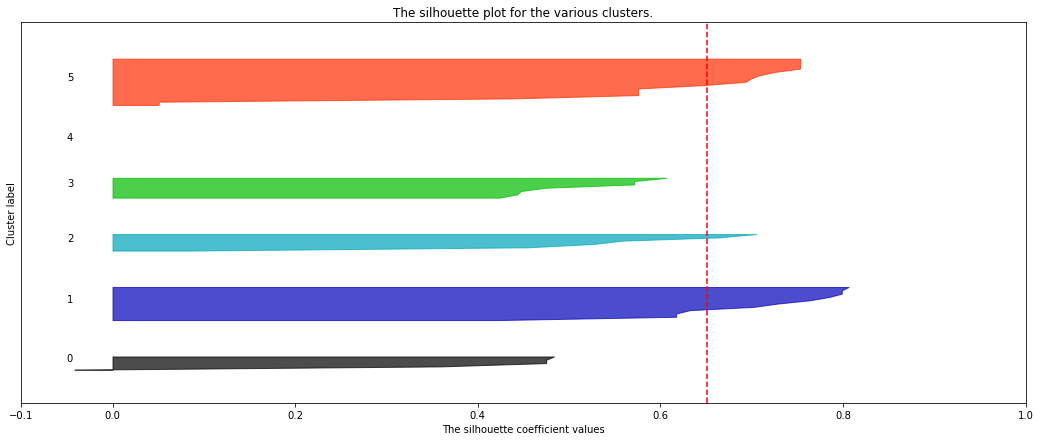

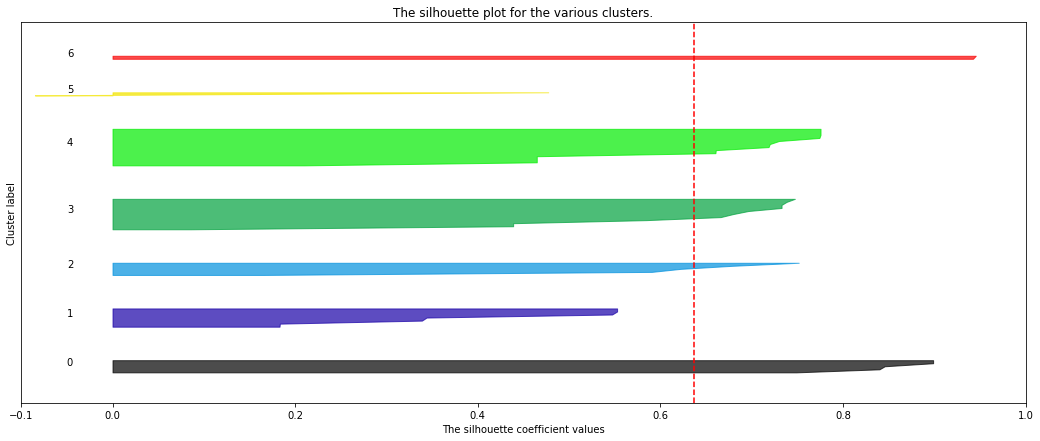

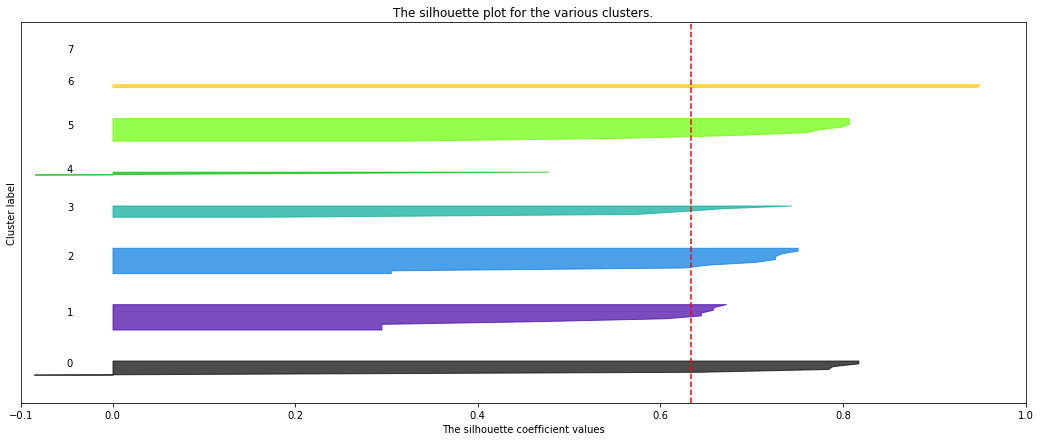

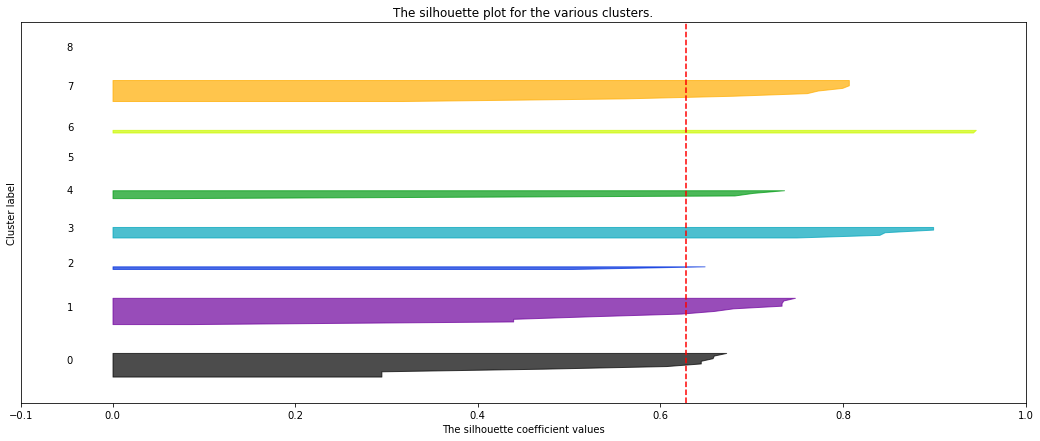

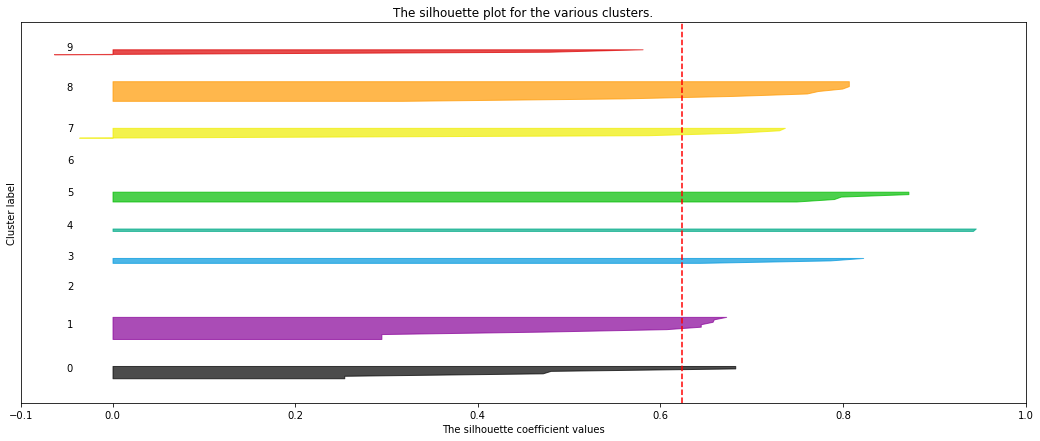

In [109]:
import matplotlib.cm as cm
from sklearn import metrics as m
sil_s = []

for k in ks:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + ((k) + 1) * 10])
    model_pred = KMeans(n_clusters=k).fit_predict(x_cols)
    sil_s.append(m.silhouette_score(x_cols, labels=KMeans(n_clusters=k).fit_predict(x_cols)))
    sil_samples = m.silhouette_samples(x_cols, model_pred)
    s_v_for_k = []

    y_lower = 10
    for i in range(k):
        
        ith_cluster_silhouette_values = sil_samples[model_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=np.mean(sil_s), color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


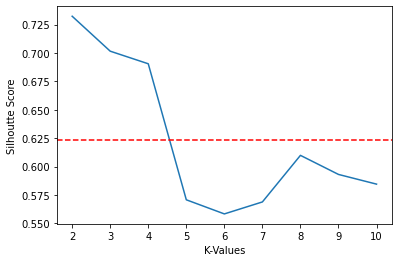

In [110]:
_ = plt.figure()
_ = plt.plot(ks, sil_s)
_ = plt.xlabel('K-Values')
_ = plt.ylabel('Silhoutte Score')
_ = plt.axhline(y=np.mean(sil_s), c='red', linestyle='--')

In [111]:
print("It seems like K-Value equals to 3 will generate the best result.")

It seems like K-Value equals to 3 will generate the best result.


In [112]:
modelK = KMeans(n_clusters=3)
pred = modelK.fit_predict(x_cols)
t1['loc'] = pred

## 2.3 SARIMAX Models

In [18]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [625]:
def evaluate_arima_model(data, arima_order):

    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = SARIMAX(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error
# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('SARIMAX%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best SARIMAX%s MSE=%.3f' % (best_cfg, best_score))

In [626]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [113]:
df_with_loc = df_1.merge(t1, left_on ='Store', right_on=t1.index)

In [114]:
df_with_loc

Store        Date  Weekly_Sales  Holiday_Flag  Temperature_x  \
0         1  2010-02-05    1643690.90             0          42.31   
1         1  2010-02-12    1641957.44             1          38.51   
2         1  2010-02-19    1611968.17             0          39.93   
3         1  2010-02-26    1409727.59             0          46.63   
4         1  2010-03-05    1554806.68             0          46.50   
...     ...         ...           ...           ...            ...   
6430     45  2012-09-28     713173.95             0          64.88   
6431     45  2012-10-05     733455.07             0          64.89   
6432     45  2012-10-12     734464.36             0          54.47   
6433     45  2012-10-19     718125.53             0          56.47   
6434     45  2012-10-26     760281.43             0          58.85   

      Fuel_Price_x         CPI  Unemployment  stock_price    sp500  year  \
0            2.572  211.096358         8.106     53.45000  1066.19  2010   
1            2.548  211.242170         8.106     52.89999  1075.51  2010   
2            2.514  211.289143         8.106     53.49001  1109.17  2010   
3            2.561  211.319643         8.106     54.07001  1104.49  2010   
4            2.625  211.350143         8.106     54.14000  1138.69  2010   
...            ...         ...           ...          ...      ...   ...   
6430         3.997  192.013558         8.684     73.80000  1440.67  2012   
6431         3.985  192.170412         8.667     75.13000  1460.93  2012   
6432         4.000  192.327265         8.667     75.81000  1428.59  2012   
6433         3.969  192.330854         8.667     75.62000  1433.19  2012   
6434         3.882  192.308899         8.667     75.11000  1411.94  2012   

      Temperature_y  Fuel_Price_y  loc  
0         68.306783      3.219699    1  
1         68.306783      3.219699    1  
2         68.306783      3.219699    1  
3         68.306783      3.219699    1  
4         68.306783      3.219699    1  
...             ...           ...  ...  
6430      57.790979      3.417608    2  
6431      57.790979      3.417608    2  
6432      57.790979      3.417608    2  
6433      57.790979      3.417608    2  
6434      57.790979      3.417608    2  

[6435 rows x 14 columns]

In [628]:
df_temp = pd.get_dummies(df_with_loc['Store'], prefix='store')
df_with_loc_nostore = df_with_loc.drop('Store', axis=1)
df_temp = df_with_loc_nostore.join(df_temp)
one_hot_loc = pd.get_dummies(df_temp['loc'], prefix='loc')
df_temp.drop('loc', axis=1, inplace=True)
df_temp = df_temp.join(one_hot_loc)

In [629]:
df_temp_nostore.head()

Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0  2010-02-05    1643690.90             0        42.31       2.572   
1  2010-02-12    1641957.44             1        38.51       2.548   
2  2010-02-19    1611968.17             0        39.93       2.514   
3  2010-02-26    1409727.59             0        46.63       2.561   
4  2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  stock_price    sp500  loc_0  loc_1  loc_2  
0  211.096358         8.106     53.45000  1066.19      0      1      0  
1  211.242170         8.106     52.89999  1075.51      0      1      0  
2  211.289143         8.106     53.49001  1109.17      0      1      0  
3  211.319643         8.106     54.07001  1104.49      0      1      0  
4  211.350143         8.106     54.14000  1138.69      0      1      0

In [630]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [631]:
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use kpss()
kpss(df_2['Weekly_Sales'], nlags='legacy')

(0.12207666377015824,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

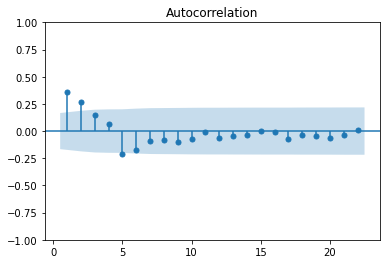

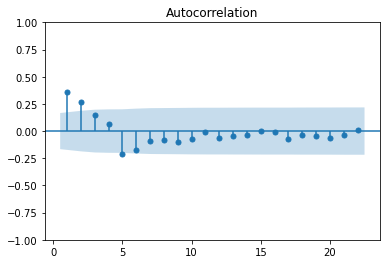

In [632]:
plot_acf(df_2['Weekly_Sales'], zero=False)

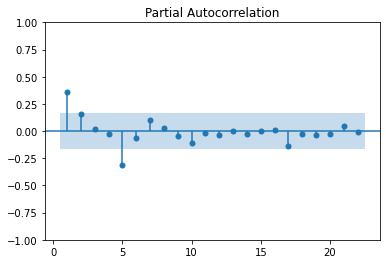

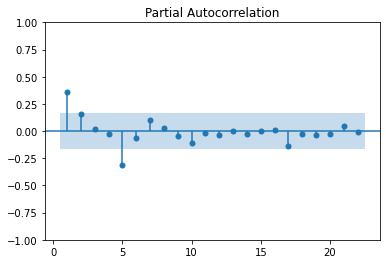

In [633]:
plot_pacf(df_2['Weekly_Sales'], zero=False)

In [634]:
df_2['Weekly_Sales']

0      49750740.50
1      48336677.63
2      48276993.78
3      43968571.13
4      46871470.30
          ...     
134    43734899.40
135    47566639.31
136    46128514.25
137    45122410.57
138    45544116.29
Name: Weekly_Sales, Length: 139, dtype: float64

In [15]:
from pmdarima.arima import auto_arima

In [636]:
arima_model = auto_arima(df_2['Weekly_Sales'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4343.991, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4363.965, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4318.606, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4299.943, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4341.972, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4301.836, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4301.807, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4316.107, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4313.439, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4301.813, Time=0.22 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4304.256, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4302.590, Time=0.15 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=4304.959, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]

In [16]:
size = int(len(df_2) * 0.8)
X_train, X_test = df_2[0:size], df_2[size:len(df_2)]

In [19]:
model = SARIMAX(X_train['Weekly_Sales'],  
                order = (0, 1, 1),  
                seasonal_order =(0, 1, 1, 12))
result = model.fit() 
result.summary() 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52175D+01    |proj g|=  1.61621D-01

At iterate    5    f=  1.51498D+01    |proj g|=  1.08899D-01

At iterate   10    f=  1.51382D+01    |proj g|=  2.60734D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     19      1     0     0   2.607D-06   1.514D+01
  F =   15.138207009449497     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  111
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1680.341
Date:                            Sat, 20 Aug 2022   AIC                           3366.682
Time:                                    16:38:24   BIC                           3374.437
Sample:                                         0   HQIC                          3369.819
                                            - 111                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3704      0.076     -4.852      0.000      -0.520      -0.221
ma.S.L12      -0.6280      0.133     -4.740      0.000      -0.888      -0.368
sigma2      6.079e+13    3.6e-16   1.69e+29      0.000    6.08e+13    6.08e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                75.21
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.12
Prob(H) (two-sided):                  0.46   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.15e+45. Standard errors may be unstable.
"""

<AxesSubplot:>

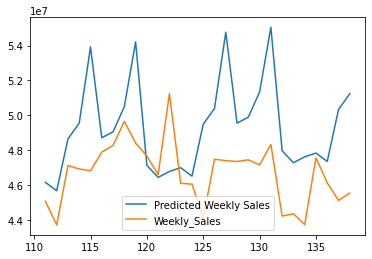

In [20]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

#Prediction
start_index = len(X_train)
end_index = len(df_2)-1
prediction = result.predict(start_index, end_index).rename('Predicted Weekly Sales') 
#Rename the column

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['Weekly_Sales'].plot(legend = True) 

In [26]:
len(X_test['Weekly_Sales'])

28

In [33]:
import math

In [34]:
mse_sarimax = mean_squared_error(np.array(X_test['Weekly_Sales']), train_prediction[-28:])
rmse_sarimax = math.sqrt(mse_sarimax)

In [640]:
df_2_sarimax = df_2.copy()
df_2_sarimax.iloc[start_index:,1] = prediction
df_2_sarimax.head(-5)

time  Weekly_Sales   Walmart    sp500  Temperature  Fuel_Price  \
0    2010-02-05  4.975074e+07  53.45000  1066.19    34.037333    2.717844   
1    2010-02-12  4.833668e+07  52.89999  1075.51    34.151333    2.694022   
2    2010-02-19  4.827699e+07  53.49001  1109.17    37.719778    2.672067   
3    2010-02-26  4.396857e+07  54.07001  1104.49    39.243556    2.683933   
4    2010-03-05  4.687147e+07  54.14000  1138.69    42.917333    2.731200   
..          ...           ...       ...      ...          ...         ...   
129  2012-08-24  4.989899e+07  72.11000  1411.13    74.592889    3.759644   
130  2012-08-31  5.134260e+07  72.60001  1406.58    77.793556    3.769067   
131  2012-09-07  5.505439e+07  73.82001  1437.92    78.038667    3.842556   
132  2012-09-14  4.797048e+07  74.50000  1465.77    70.238222    3.852044   
133  2012-09-21  4.728370e+07  74.45000  1460.15    67.924889    3.907911   

            CPI  Unemployment  Holiday_Flag  
0    167.730885      8.619311             0  
1    167.825608      8.619311             1  
2    167.871686      8.619311             0  
3    167.909657      8.619311             0  
4    167.947628      8.619311             0  
..          ...           ...           ...  
129  175.833841      7.237333             0  
130  175.924154      7.237333             0  
131  176.014468      7.237333             1  
132  176.110660      7.237333             0  
133  176.242124      7.237333             0  

[134 rows x 9 columns]

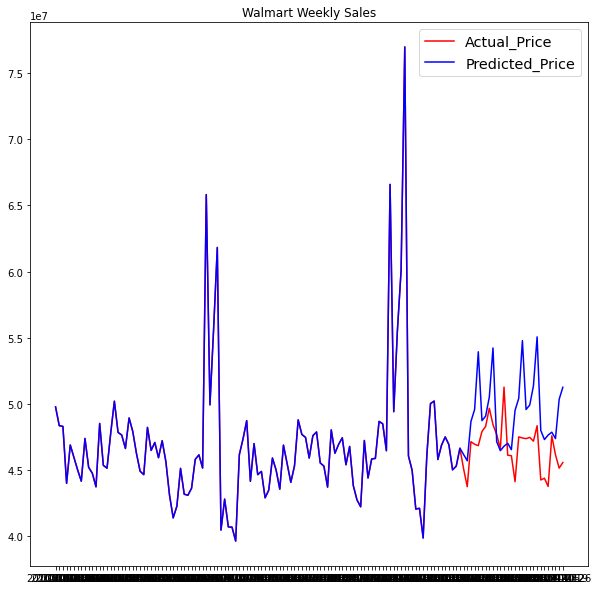

In [641]:
x = df_2.time
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Walmart Weekly Sales")
ax.plot(x,df_2['Weekly_Sales'],color='red',label='Actual_Price')
ax.plot(x,df_2_sarimax['Weekly_Sales'],color='blue',label='Predicted_Price')
plt.legend(loc='upper right', fontsize='x-large')

## 2.4 LSTM

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Concatenate, Input
from tensorflow.keras.optimizers import Adam 

In [38]:
scaler = StandardScaler()

In [67]:
df_2

time  Weekly_Sales   Walmart    sp500  Temperature  Fuel_Price  \
0   2010-02-05   49750740.50  53.45000  1066.19    34.037333    2.717844   
1   2010-02-12   48336677.63  52.89999  1075.51    34.151333    2.694022   
2   2010-02-19   48276993.78  53.49001  1109.17    37.719778    2.672067   
3   2010-02-26   43968571.13  54.07001  1104.49    39.243556    2.683933   
4   2010-03-05   46871470.30  54.14000  1138.69    42.917333    2.731200   
..         ...           ...       ...      ...          ...         ...   
134 2012-09-28   43734899.40  73.80000  1440.67    68.754444    3.854578   
135 2012-10-05   47566639.31  75.13000  1460.93    65.973111    3.845222   
136 2012-10-12   46128514.25  75.81000  1428.59    58.342667    3.896733   
137 2012-10-19   45122410.57  75.62000  1433.19    60.705333    3.880000   
138 2012-10-26   45544116.29  75.11000  1411.94    61.051111    3.791489   

            CPI  Unemployment  Holiday_Flag  
0    167.730885      8.619311             0  
1    167.825608      8.619311             1  
2    167.871686      8.619311             0  
3    167.909657      8.619311             0  
4    167.947628      8.619311             0  
..          ...           ...           ...  
134  176.373588      7.237333             0  
135  176.505052      6.953711             0  
136  176.636515      6.953711             0  
137  176.652613      6.953711             0  
138  176.649482      6.953711             0  

[139 rows x 9 columns]

In [68]:
df_2['time'] = pd.to_datetime(pd.to_datetime(df_2.time, format='%Y-%m-%d').dt.strftime('%Y-%m-%d'))

In [69]:
df_lstm = df_2.iloc[:,1:df_2.shape[1]]

In [84]:
df_temp = df_2.iloc[:,1:df_2.shape[1]]

In [89]:
a = df_temp.iloc[int(len(df_2)*0.8):,:]

In [70]:
df_lstm = scaler.fit_transform(df_lstm)

In [43]:
df_lstm_train, df_lstm_test = df_lstm[:int(len(df_lstm)*0.8),:], df_lstm[int(len(df_lstm)*0.8):,:]

In [44]:
#I want to use about 2 months to predict
n_future = 1
n_past = 8

X_train = []
y_train = []

for i in range(n_past, len(df_lstm_train)- n_future +1):
    X_train.append(df_lstm_train[i - n_past:i, 0:df_2.shape[1]])
    y_train.append(df_lstm_train[i + n_future - 1:i + n_future, 0])

In [81]:
X_test = []
y_test = []
for i in range(n_past, len(df_lstm_test)- n_future +1):
    X_test.append(df_lstm_test[i - n_past:i, 0:df_2.shape[1]])
    y_test.append(df_lstm_test[i + n_future - 1:i + n_future, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)

In [46]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
X_train.shape

(103, 8, 8)

In [48]:
y_train.shape

(103, 1)

NameError: name 'history' is not defined

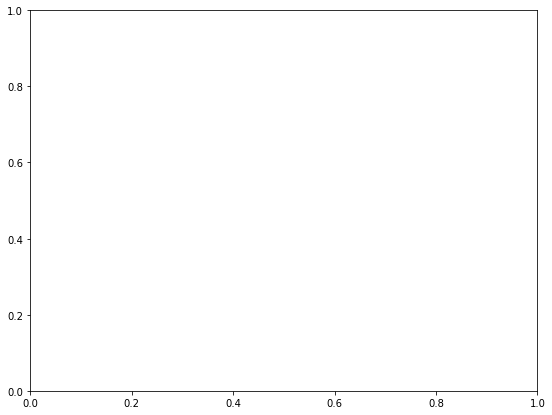

In [49]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [654]:
#We will have a hyperparameter tuning function for our LSTM. 
#Using a function from Kaggle
def LSTM_HyperParameter_Tuning(x_train, y_train, x_test, y_test, config):

    first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = [i for i in itertools.product(first_additional_layer, second_additional_layer,
                                                  n_neurons, n_batch_size, dropout)]

    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'No.{i+1} combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))
        

        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(y_train.shape[1], activation='linear'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)


        regressor.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=n_batch_size, callbacks=[es,mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)

        hist.append([i for i in (first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)])

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
    return hist

In [655]:
import itertools

In [656]:
config = [[True,False], [False], [16, 32, 64], [4, 8, 16], [0.1, 0.2]] 
hist = LSTM_HyperParameter_Tuning(X_train, y_train, X_test, y_test,config)  

[(True, False, 16, 4, 0.1), (True, False, 16, 4, 0.2), (True, False, 16, 8, 0.1), (True, False, 16, 8, 0.2), (True, False, 16, 16, 0.1), (True, False, 16, 16, 0.2), (True, False, 32, 4, 0.1), (True, False, 32, 4, 0.2), (True, False, 32, 8, 0.1), (True, False, 32, 8, 0.2), (True, False, 32, 16, 0.1), (True, False, 32, 16, 0.2), (True, False, 64, 4, 0.1), (True, False, 64, 4, 0.2), (True, False, 64, 8, 0.1), (True, False, 64, 8, 0.2), (True, False, 64, 16, 0.1), (True, False, 64, 16, 0.2), (False, False, 16, 4, 0.1), (False, False, 16, 4, 0.2), (False, False, 16, 8, 0.1), (False, False, 16, 8, 0.2), (False, False, 16, 16, 0.1), (False, False, 16, 16, 0.2), (False, False, 32, 4, 0.1), (False, False, 32, 4, 0.2), (False, False, 32, 8, 0.1), (False, False, 32, 8, 0.2), (False, False, 32, 16, 0.1), (False, False, 32, 16, 0.2), (False, False, 64, 4, 0.1), (False, False, 64, 4, 0.2), (False, False, 64, 8, 0.1), (False, False, 64, 8, 0.2), (False, False, 64, 16, 0.1), (False, False, 64, 16, 0.2


Epoch 1: val_loss improved from inf to 0.33800, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.33800

Epoch 3: val_loss did not improve from 0.33800

Epoch 4: val_loss did not improve from 0.33800

Epoch 5: val_loss did not improve from 0.33800

Epoch 6: val_loss did not improve from 0.33800

Epoch 7: val_loss did not improve from 0.33800

Epoch 8: val_loss did not improve from 0.33800
Epoch 8: early stopping
9-th combination = (True, False, 32, 8, 0.2) 
 train accuracy: [1.1402220726013184, 1.0678118467330933] and test accuracy: [2.394289493560791, 1.547349214553833]
--------------------------------------------------------------------
--------------------------------------------------------------------
No.11 combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.32413, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.32413

Epoch 3: val_loss did not improve from 0.32


Epoch 1: val_loss improved from inf to 0.43378, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.43378

Epoch 3: val_loss did not improve from 0.43378

Epoch 4: val_loss did not improve from 0.43378

Epoch 5: val_loss did not improve from 0.43378

Epoch 6: val_loss did not improve from 0.43378

Epoch 7: val_loss did not improve from 0.43378

Epoch 8: val_loss did not improve from 0.43378
Epoch 8: early stopping
19-th combination = (False, False, 16, 4, 0.2) 
 train accuracy: [1.1399900913238525, 1.067703127861023] and test accuracy: [0.8803234100341797, 0.9382554888725281]
--------------------------------------------------------------------
--------------------------------------------------------------------
No.21 combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.33522, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.33522

Epoch 3: val_loss did not improve from 0


Epoch 1: val_loss improved from inf to 0.33756, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.33756

Epoch 3: val_loss did not improve from 0.33756

Epoch 4: val_loss did not improve from 0.33756

Epoch 5: val_loss did not improve from 0.33756

Epoch 6: val_loss did not improve from 0.33756

Epoch 7: val_loss did not improve from 0.33756

Epoch 8: val_loss did not improve from 0.33756
Epoch 8: early stopping
29-th combination = (False, False, 32, 16, 0.2) 
 train accuracy: [1.1386849880218506, 1.0670918226242065] and test accuracy: [0.23518404364585876, 0.4849577844142914]
--------------------------------------------------------------------
--------------------------------------------------------------------
No.31 combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.34414, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.34414

Epoch 3: val_loss did not improve fro

In [657]:
df_lstm_models = pd.DataFrame(hist)
df_lstm_models = df_lstm_models.sort_values(by=[6], ascending=True)
df_lstm_models = df_lstm_models.rename(columns={0:'First_Additional', 1:"Second_Additional", 2:"n_neurons",3: "n_batch_size", 4:"dropout",5:"Train_Acc",6:"Test_Acc"})

In [658]:
best = df_lstm_models.iloc[0,:]
print(best)

First_Additional                                        False
Second_Additional                                       False
n_neurons                                                  16
n_batch_size                                                8
dropout                                                   0.1
Train_Acc            [1.1022461652755737, 1.0498790740966797]
Test_Acc              [0.13485297560691833, 0.36722332239151]
Name: 20, dtype: object


In [659]:
lstm_df = pd.DataFrame(best)
lstm_df = lstm_df.to_csv(r'../Capstone_Project_3/best_lstm.csv')

In [35]:
best_model = pd.read_csv('../Capstone_Project_3/best_lstm.csv')

In [36]:
best_model

Unnamed: 0                                        20
0   First_Additional                                     False
1  Second_Additional                                     False
2          n_neurons                                        16
3       n_batch_size                                         8
4            dropout                                       0.1
5          Train_Acc  [1.1022461652755737, 1.0498790740966797]
6           Test_Acc   [0.13485297560691833, 0.36722332239151]

In [660]:
print('The above model is the best model we have.')

The above model is the best model we have.


In [60]:
a=[i for i in best_model.iloc[:-2,1]]

In [56]:
first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout = [i for i in df_lstm_models.iloc[0, :-2]]

NameError: name 'df_lstm_models' is not defined

In [63]:
regressor = Sequential()
regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

regressor.add(LSTM(units=n_neurons, return_sequences=False))
regressor.add(Dropout(dropout))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)


Epoch 1: val_loss improved from inf to 2.66613, saving model to best_model.h5

Epoch 2: val_loss did not improve from 2.66613

Epoch 3: val_loss did not improve from 2.66613

Epoch 4: val_loss did not improve from 2.66613

Epoch 5: val_loss did not improve from 2.66613

Epoch 6: val_loss did not improve from 2.66613
Epoch 6: early stopping


In [664]:
regressor.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.1674


0.1674082726240158

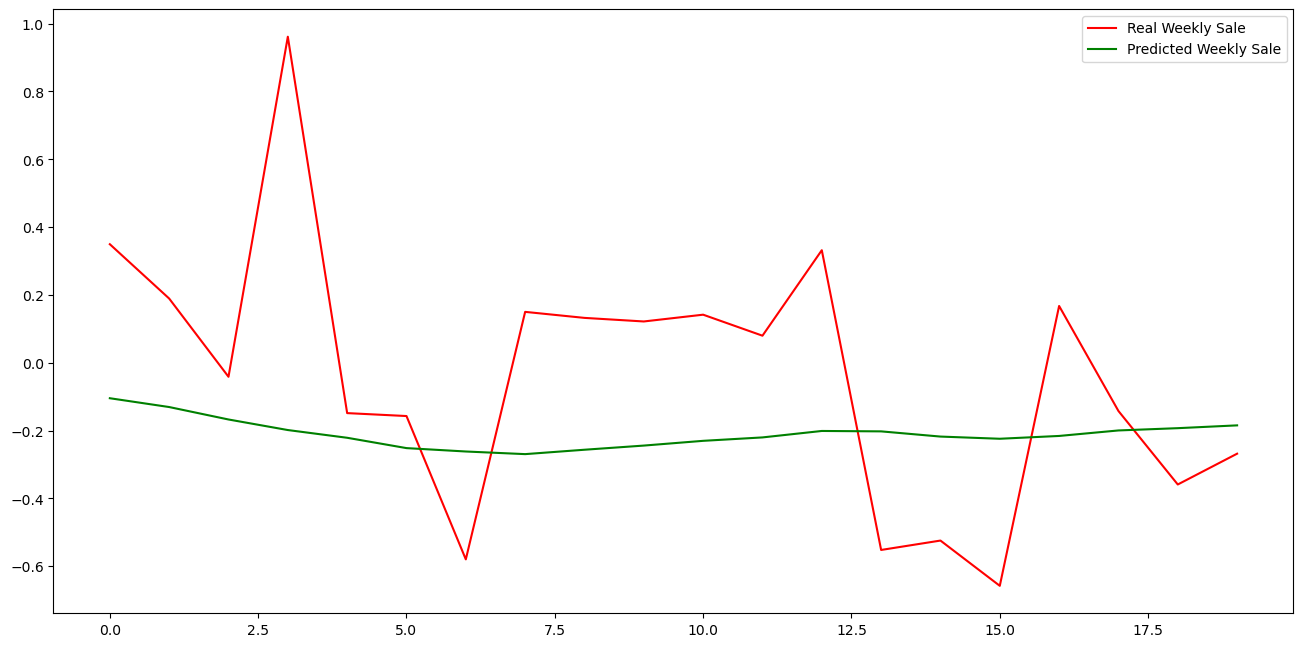

In [665]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Real Weekly Sale')
plt.plot(y_pred, color='green', label = 'Predicted Weekly Sale')
plt.legend(loc='best')

In [71]:
prediction_copies = np.repeat(y_pred, df_lstm.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [75]:
y_test = np.repeat(y_test, df_lstm.shape[1], axis=-1)


In [72]:
y_pred_future

array([46310228., 46315760., 46312572., 46336168., 46364896., 46395972.,
       46420968., 46455400., 46495808., 46515368., 46521108., 46506624.,
       46534360., 46525988., 46506600., 46464244., 46434868., 46396400.,
       46357044., 46325140.], dtype=float32)

In [95]:
np.array(df_2['Weekly_Sales'][-20:])

array([48412110.7 , 47668284.97, 46597112.12, 51253021.88, 46099732.1 ,
       46059543.45, 44097154.97, 47485899.56, 47403451.04, 47354452.05,
       47447323.6 , 47159639.43, 48330059.31, 44226038.65, 44354547.11,
       43734899.4 , 47566639.31, 46128514.25, 45122410.57, 45544116.29])

In [97]:
mse_lstm = mean_squared_error(np.array(df_2['Weekly_Sales'][-20:]), y_pred_future,)
rmse_lstm = math.sqrt(mse_lstm)

In [79]:
len(y_pred_future)

20

In [77]:
df_2

time  Weekly_Sales   Walmart    sp500  Temperature  Fuel_Price  \
0   2010-02-05   49750740.50  53.45000  1066.19    34.037333    2.717844   
1   2010-02-12   48336677.63  52.89999  1075.51    34.151333    2.694022   
2   2010-02-19   48276993.78  53.49001  1109.17    37.719778    2.672067   
3   2010-02-26   43968571.13  54.07001  1104.49    39.243556    2.683933   
4   2010-03-05   46871470.30  54.14000  1138.69    42.917333    2.731200   
..         ...           ...       ...      ...          ...         ...   
134 2012-09-28   43734899.40  73.80000  1440.67    68.754444    3.854578   
135 2012-10-05   47566639.31  75.13000  1460.93    65.973111    3.845222   
136 2012-10-12   46128514.25  75.81000  1428.59    58.342667    3.896733   
137 2012-10-19   45122410.57  75.62000  1433.19    60.705333    3.880000   
138 2012-10-26   45544116.29  75.11000  1411.94    61.051111    3.791489   

            CPI  Unemployment  Holiday_Flag  
0    167.730885      8.619311             0  
1    167.825608      8.619311             1  
2    167.871686      8.619311             0  
3    167.909657      8.619311             0  
4    167.947628      8.619311             0  
..          ...           ...           ...  
134  176.373588      7.237333             0  
135  176.505052      6.953711             0  
136  176.636515      6.953711             0  
137  176.652613      6.953711             0  
138  176.649482      6.953711             0  

[139 rows x 9 columns]

In [674]:
df_2_copy = df_2.copy()

In [686]:
y_pred_future.shape

(20,)

In [689]:
df_pred_lstm.iloc[119:, 1] = y_pred_future

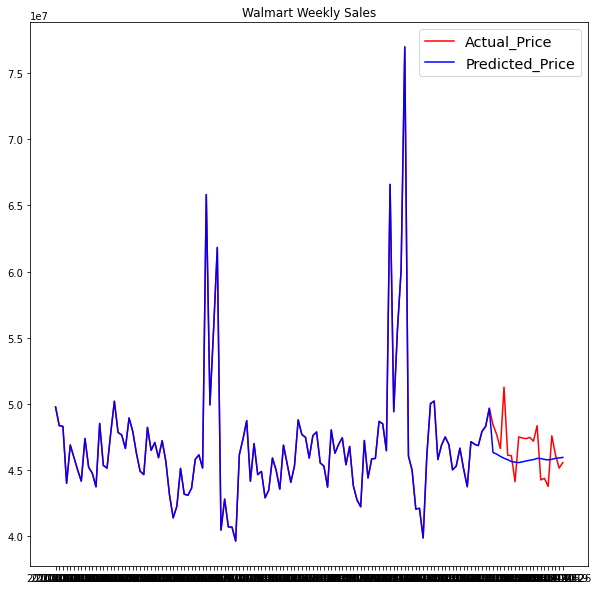

In [690]:
x = df_2.time
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Walmart Weekly Sales")
ax.plot(x,df_2['Weekly_Sales'],color='red',label='Actual_Price')
ax.plot(x,df_pred_lstm['Weekly_Sales'],color='blue',label='Predicted_Price')
plt.legend(loc='upper right', fontsize='x-large')

## 2.5 LSTM with Multiple Inputs

In [691]:
df_loc0 = df_temp_nostore[df_temp_nostore['loc_0']==1].groupby('Date').agg({'Weekly_Sales':'sum', 'Temperature':'mean','Fuel_Price':'mean','CPI':'mean','Unemployment':'mean','stock_price':'mean','sp500':'mean', 'Holiday_Flag':'min'})
df_loc1 = df_temp_nostore[df_temp_nostore['loc_1']==1].groupby('Date').agg({'Weekly_Sales':'sum', 'Temperature':'mean','Fuel_Price':'mean','CPI':'mean','Unemployment':'mean','stock_price':'mean','sp500':'mean', 'Holiday_Flag':'min'})
df_loc2 = df_temp_nostore[df_temp_nostore['loc_2']==1].groupby('Date').agg({'Weekly_Sales':'sum', 'Temperature':'mean','Fuel_Price':'mean','CPI':'mean','Unemployment':'mean','stock_price':'mean','sp500':'mean', 'Holiday_Flag':'min'})


In [692]:
df_loc0.head()

Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
Date                                                                          
2010-02-05    6250488.53    17.568571    2.681429  155.595838         7.202   
2010-02-12    6265671.91    20.842857    2.671429  155.664131         7.202   
2010-02-19    6064603.77    24.965714    2.649286  155.719941         7.202   
2010-02-26    5598828.76    24.832857    2.669143  155.773670         7.202   
2010-03-05    6089456.73    32.054286    2.691286  155.827400         7.202   

            stock_price    sp500  Holiday_Flag  
Date                                            
2010-02-05     53.45000  1066.19             0  
2010-02-12     52.89999  1075.51             1  
2010-02-19     53.49001  1109.17             0  
2010-02-26     54.07001  1104.49             0  
2010-03-05     54.14000  1138.69             0

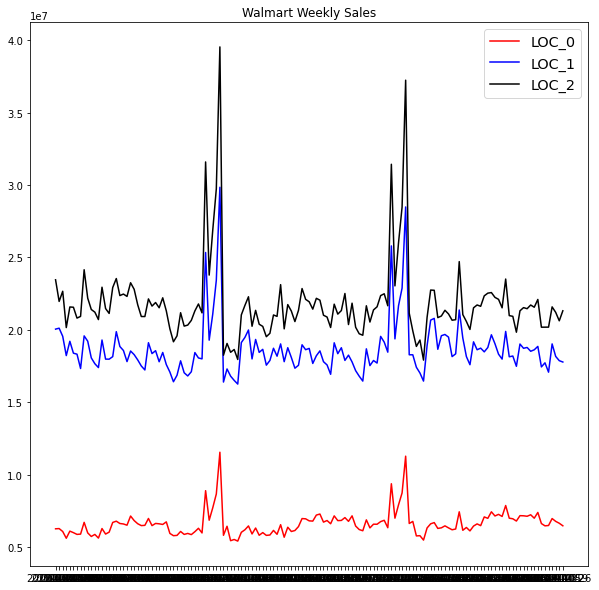

In [693]:
x = df_loc0.index
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Walmart Weekly Sales")
ax.plot(x,df_loc0['Weekly_Sales'],color='red',label='LOC_0')
ax.plot(x,df_loc1['Weekly_Sales'],color='blue',label='LOC_1')
ax.plot(x,df_loc2['Weekly_Sales'],color='black',label='LOC_2')

plt.legend(loc='upper right', fontsize='x-large')

### A key insight from this graph is that based on temperature and gas price, walmart stores's weekly sales follow similar patterns, but their weekly sales are siginificantly different.

In [694]:
df_loc0['Total_WS'] = df_loc0['Weekly_Sales'] + df_loc1['Weekly_Sales'] + df_loc2['Weekly_Sales']
df_loc1['Total_WS'] = df_loc0['Weekly_Sales'] + df_loc1['Weekly_Sales'] + df_loc2['Weekly_Sales']
df_loc2['Total_WS'] = df_loc0['Weekly_Sales'] + df_loc1['Weekly_Sales'] + df_loc2['Weekly_Sales']

In [695]:
y = df_loc0['Total_WS']

In [696]:
loc0=df_loc0.iloc[:, :-1]
loc1=df_loc1.iloc[:, :-1]
loc2=df_loc2.iloc[:, :-1]

In [697]:
loc0 = loc0.reset_index().drop(columns='Date')

In [698]:
loc1 = loc1.reset_index().drop(columns='Date')
loc2 = loc2.reset_index().drop(columns='Date')

In [699]:
scaler0 = StandardScaler()
loc0 = scaler0.fit_transform(loc0)

In [700]:
#I want to use about 2 months to predict
n_future = 1
n_past = 8

X_train0 = []
y_train0 = []

loc0_tr, loc0_te = loc0[:int(len(loc0)*0.8),:], loc0[int(len(loc0)*0.8):,:]

for i in range(n_past, len(loc0_tr)- n_future +1):
    X_train0.append(loc0_tr[i - n_past:i, 0:loc0.shape[1]])
    y_train0.append(loc0_tr[i + n_future - 1:i + n_future, 0])
    
X_test0 = []
y_test0 = []
for i in range(n_past, len(loc0_te)- n_future +1):
    X_test0.append(loc0_te[i - n_past:i, 0:loc0_te.shape[1]])
    y_test0.append(loc0_te[i + n_future - 1:i + n_future, 0])

X_train0, y_train0 = np.array(X_train0), np.array(y_train0)
X_test0, y_test0 = np.array(X_test0), np.array(y_test0)


In [701]:
scaler1 = StandardScaler()
loc1 = scaler1.fit_transform(loc1)
#I want to use about 2 months to predict
n_future = 1
n_past = 8

X_train1 = []
y_train1 = []

loc1_tr, loc1_te = loc1[:int(len(loc1)*0.8),:], loc1[int(len(loc1)*0.8):,:]

for i in range(n_past, len(loc1_tr)- n_future +1):
    X_train1.append(loc1_tr[i - n_past:i, 0:loc1.shape[1]])
    y_train1.append(loc1_tr[i + n_future - 1:i + n_future, 0])
    
X_test1 = []
y_test1 = []
for i in range(n_past, len(loc1_te)- n_future +1):
    X_test1.append(loc1_te[i - n_past:i, 0:loc1_te.shape[1]])
    y_test1.append(loc1_te[i + n_future - 1:i + n_future, 0])

X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_test1, y_test1 = np.array(X_test1), np.array(y_test1)


In [702]:
scaler2 = StandardScaler()
loc2 = scaler2.fit_transform(loc1)
#I want to use about 2 months to predict
n_future = 1
n_past = 8

X_train2 = []
y_train2 = []

loc2_tr, loc2_te = loc2[:int(len(loc2)*0.8),:], loc1[int(len(loc2)*0.8):,:]

for i in range(n_past, len(loc2_tr)- n_future +1):
    X_train2.append(loc2_tr[i - n_past:i, 0:loc2.shape[1]])
    y_train2.append(loc2_tr[i + n_future - 1:i + n_future, 0])
    
X_test2 = []
y_test2 = []
for i in range(n_past, len(loc2_te)- n_future +1):
    X_test2.append(loc2_te[i - n_past:i, 0:loc2_te.shape[1]])
    y_test2.append(loc2_te[i + n_future - 1:i + n_future, 0])

X_train2, y_train2 = np.array(X_train2), np.array(y_train2)
X_test2, y_test2 = np.array(X_test2), np.array(y_test2)


In [ ]:
#MINMAX Feature
#RMSE, MAE
#One layer.

In [705]:
#We will have a hyperparameter tuning function for our LSTM. 
#Using a function from Kaggle
def LSTM_HyperParameter_Tuning_con(x_train, y_train, x_test, y_test, config):

    first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = [i for i in itertools.product(first_additional_layer, second_additional_layer,
                                                  n_neurons, n_batch_size, dropout)]

    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'No.{i+1} combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))
        

        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(y_train.shape[1], activation='linear'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

        file_path = 'best_model.h6'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)


        regressor.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=n_batch_size, callbacks=[es,mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)

        hist.append([i for i in (first_additional_layer, second_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)])

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
    return hist

In [706]:
config0 = [[True,False],[False], [8,16], [4, 8], [0.1, 0.2]]
hist0 = LSTM_HyperParameter_Tuning_con(X_train0, y_train0, X_test0, y_test0,config0)  # change x_train shape

[(True, False, 8, 4, 0.1), (True, False, 8, 4, 0.2), (True, False, 8, 8, 0.1), (True, False, 8, 8, 0.2), (True, False, 16, 4, 0.1), (True, False, 16, 4, 0.2), (True, False, 16, 8, 0.1), (True, False, 16, 8, 0.2), (False, False, 8, 4, 0.1), (False, False, 8, 4, 0.2), (False, False, 8, 8, 0.1), (False, False, 8, 8, 0.2), (False, False, 16, 4, 0.1), (False, False, 16, 4, 0.2), (False, False, 16, 8, 0.1), (False, False, 16, 8, 0.2)]


No.1 combination: 

--------------------------------------------------------------------

Epoch 1: val_loss did not improve from inf

Epoch 2: val_loss did not improve from inf

Epoch 3: val_loss did not improve from inf

Epoch 4: val_loss did not improve from inf
Epoch 4: early stopping
0-th combination = (True, False, 8, 4, 0.1) 
 train accuracy: [nan, nan] and test accuracy: [nan, nan]
--------------------------------------------------------------------
--------------------------------------------------------------------
No.2 combination: 

---------------


Epoch 1: val_loss did not improve from inf

Epoch 2: val_loss did not improve from inf

Epoch 3: val_loss did not improve from inf

Epoch 4: val_loss did not improve from inf
Epoch 4: early stopping
15-th combination = (False, False, 16, 8, 0.2) 
 train accuracy: [nan, nan] and test accuracy: [nan, nan]
--------------------------------------------------------------------
--------------------------------------------------------------------


In [707]:
config1 = [[True,False], [False], [16, 32, 64], [4, 8, 16], [0.1, 0.2]] 
hist1 = LSTM_HyperParameter_Tuning(X_train1, y_train1, X_test1, y_test1,config1)  # change x_train shape

[(True, False, 16, 4, 0.1), (True, False, 16, 4, 0.2), (True, False, 16, 8, 0.1), (True, False, 16, 8, 0.2), (True, False, 16, 16, 0.1), (True, False, 16, 16, 0.2), (True, False, 32, 4, 0.1), (True, False, 32, 4, 0.2), (True, False, 32, 8, 0.1), (True, False, 32, 8, 0.2), (True, False, 32, 16, 0.1), (True, False, 32, 16, 0.2), (True, False, 64, 4, 0.1), (True, False, 64, 4, 0.2), (True, False, 64, 8, 0.1), (True, False, 64, 8, 0.2), (True, False, 64, 16, 0.1), (True, False, 64, 16, 0.2), (False, False, 16, 4, 0.1), (False, False, 16, 4, 0.2), (False, False, 16, 8, 0.1), (False, False, 16, 8, 0.2), (False, False, 16, 16, 0.1), (False, False, 16, 16, 0.2), (False, False, 32, 4, 0.1), (False, False, 32, 4, 0.2), (False, False, 32, 8, 0.1), (False, False, 32, 8, 0.2), (False, False, 32, 16, 0.1), (False, False, 32, 16, 0.2), (False, False, 64, 4, 0.1), (False, False, 64, 4, 0.2), (False, False, 64, 8, 0.1), (False, False, 64, 8, 0.2), (False, False, 64, 16, 0.1), (False, False, 64, 16, 0.2


Epoch 1: val_loss did not improve from inf

Epoch 2: val_loss did not improve from inf

Epoch 3: val_loss did not improve from inf

Epoch 4: val_loss did not improve from inf

Epoch 5: val_loss did not improve from inf

Epoch 6: val_loss did not improve from inf

Epoch 7: val_loss did not improve from inf
Epoch 7: early stopping
11-th combination = (True, False, 32, 16, 0.2) 
 train accuracy: [nan, nan] and test accuracy: [nan, nan]
--------------------------------------------------------------------
--------------------------------------------------------------------
No.13 combination: 

--------------------------------------------------------------------

Epoch 1: val_loss did not improve from inf

Epoch 2: val_loss did not improve from inf

Epoch 3: val_loss did not improve from inf

Epoch 4: val_loss did not improve from inf

Epoch 5: val_loss did not improve from inf

Epoch 6: val_loss did not improve from inf

Epoch 7: val_loss did not improve from inf
Epoch 7: early stopping
12


Epoch 6: val_loss did not improve from inf

Epoch 7: val_loss did not improve from inf
Epoch 7: early stopping
23-th combination = (False, False, 16, 16, 0.2) 
 train accuracy: [nan, nan] and test accuracy: [nan, nan]
--------------------------------------------------------------------
--------------------------------------------------------------------
No.25 combination: 

--------------------------------------------------------------------

Epoch 1: val_loss did not improve from inf

Epoch 2: val_loss did not improve from inf

Epoch 3: val_loss did not improve from inf

Epoch 4: val_loss did not improve from inf

Epoch 5: val_loss did not improve from inf

Epoch 6: val_loss did not improve from inf

Epoch 7: val_loss did not improve from inf
Epoch 7: early stopping
24-th combination = (False, False, 32, 4, 0.1) 
 train accuracy: [nan, nan] and test accuracy: [nan, nan]
--------------------------------------------------------------------
----------------------------------------------

In [708]:
config2 = [[True,False], [False], [16, 32, 64], [4, 8, 16], [0.1, 0.2]] 
hist2 = LSTM_HyperParameter_Tuning(X_train2, y_train2, X_test2, y_test2,config2)  # change x_train shape

[(True, False, 16, 4, 0.1), (True, False, 16, 4, 0.2), (True, False, 16, 8, 0.1), (True, False, 16, 8, 0.2), (True, False, 16, 16, 0.1), (True, False, 16, 16, 0.2), (True, False, 32, 4, 0.1), (True, False, 32, 4, 0.2), (True, False, 32, 8, 0.1), (True, False, 32, 8, 0.2), (True, False, 32, 16, 0.1), (True, False, 32, 16, 0.2), (True, False, 64, 4, 0.1), (True, False, 64, 4, 0.2), (True, False, 64, 8, 0.1), (True, False, 64, 8, 0.2), (True, False, 64, 16, 0.1), (True, False, 64, 16, 0.2), (False, False, 16, 4, 0.1), (False, False, 16, 4, 0.2), (False, False, 16, 8, 0.1), (False, False, 16, 8, 0.2), (False, False, 16, 16, 0.1), (False, False, 16, 16, 0.2), (False, False, 32, 4, 0.1), (False, False, 32, 4, 0.2), (False, False, 32, 8, 0.1), (False, False, 32, 8, 0.2), (False, False, 32, 16, 0.1), (False, False, 32, 16, 0.2), (False, False, 64, 4, 0.1), (False, False, 64, 4, 0.2), (False, False, 64, 8, 0.1), (False, False, 64, 8, 0.2), (False, False, 64, 16, 0.1), (False, False, 64, 16, 0.2


KeyboardInterrupt



## 2.6 Random Forest Regressor

In [118]:
df_t = df_with_loc

In [119]:
df_t

Store        Date  Weekly_Sales  Holiday_Flag  Temperature_x  \
0         1  2010-02-05    1643690.90             0          42.31   
1         1  2010-02-12    1641957.44             1          38.51   
2         1  2010-02-19    1611968.17             0          39.93   
3         1  2010-02-26    1409727.59             0          46.63   
4         1  2010-03-05    1554806.68             0          46.50   
...     ...         ...           ...           ...            ...   
6430     45  2012-09-28     713173.95             0          64.88   
6431     45  2012-10-05     733455.07             0          64.89   
6432     45  2012-10-12     734464.36             0          54.47   
6433     45  2012-10-19     718125.53             0          56.47   
6434     45  2012-10-26     760281.43             0          58.85   

      Fuel_Price_x         CPI  Unemployment  stock_price    sp500  year  \
0            2.572  211.096358         8.106     53.45000  1066.19  2010   
1            2.548  211.242170         8.106     52.89999  1075.51  2010   
2            2.514  211.289143         8.106     53.49001  1109.17  2010   
3            2.561  211.319643         8.106     54.07001  1104.49  2010   
4            2.625  211.350143         8.106     54.14000  1138.69  2010   
...            ...         ...           ...          ...      ...   ...   
6430         3.997  192.013558         8.684     73.80000  1440.67  2012   
6431         3.985  192.170412         8.667     75.13000  1460.93  2012   
6432         4.000  192.327265         8.667     75.81000  1428.59  2012   
6433         3.969  192.330854         8.667     75.62000  1433.19  2012   
6434         3.882  192.308899         8.667     75.11000  1411.94  2012   

      Temperature_y  Fuel_Price_y  loc  
0         68.306783      3.219699    1  
1         68.306783      3.219699    1  
2         68.306783      3.219699    1  
3         68.306783      3.219699    1  
4         68.306783      3.219699    1  
...             ...           ...  ...  
6430      57.790979      3.417608    2  
6431      57.790979      3.417608    2  
6432      57.790979      3.417608    2  
6433      57.790979      3.417608    2  
6434      57.790979      3.417608    2  

[6435 rows x 14 columns]

In [120]:
df_t = df_t.drop(columns=['Date', 'Store'])

In [122]:
one_hot_loc = pd.get_dummies(df_t['loc'], prefix='loc')
df_t.drop('loc', axis=1, inplace=True)
df_t = df_t.join(one_hot_loc)

In [133]:
df_t

Weekly_Sales  Holiday_Flag  Temperature_x  Fuel_Price_x         CPI  \
0       1643690.90             0          42.31         2.572  211.096358   
1       1641957.44             1          38.51         2.548  211.242170   
2       1611968.17             0          39.93         2.514  211.289143   
3       1409727.59             0          46.63         2.561  211.319643   
4       1554806.68             0          46.50         2.625  211.350143   
...            ...           ...            ...           ...         ...   
6430     713173.95             0          64.88         3.997  192.013558   
6431     733455.07             0          64.89         3.985  192.170412   
6432     734464.36             0          54.47         4.000  192.327265   
6433     718125.53             0          56.47         3.969  192.330854   
6434     760281.43             0          58.85         3.882  192.308899   

      Unemployment  stock_price    sp500  year  Temperature_y  Fuel_Price_y  \
0            8.106     53.45000  1066.19  2010      68.306783      3.219699   
1            8.106     52.89999  1075.51  2010      68.306783      3.219699   
2            8.106     53.49001  1109.17  2010      68.306783      3.219699   
3            8.106     54.07001  1104.49  2010      68.306783      3.219699   
4            8.106     54.14000  1138.69  2010      68.306783      3.219699   
...            ...          ...      ...   ...            ...           ...   
6430         8.684     73.80000  1440.67  2012      57.790979      3.417608   
6431         8.667     75.13000  1460.93  2012      57.790979      3.417608   
6432         8.667     75.81000  1428.59  2012      57.790979      3.417608   
6433         8.667     75.62000  1433.19  2012      57.790979      3.417608   
6434         8.667     75.11000  1411.94  2012      57.790979      3.417608   

      loc_0  loc_1  loc_2  
0         0      1      0  
1         0      1      0  
2         0      1      0  
3         0      1      0  
4         0      1      0  
...     ...    ...    ...  
6430      0      0      1  
6431      0      0      1  
6432      0      0      1  
6433      0      0      1  
6434      0      0      1  

[6435 rows x 14 columns]

In [127]:
X = df_t.iloc[:, 1:].fillna(method='ffill')
y =df_t.iloc[:,0]

In [128]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=2, shuffle=False)

In [129]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
param_grid_rf = {
    'standardscaler': [StandardScaler(), None],
    'randomforestregressor__max_depth': [80, 90, 100, 110],
    'randomforestregressor__bootstrap': [True, False],
    'randomforestregressor__min_samples_leaf': [3,4,5],
    'randomforestregressor__n_estimators': n_est}

pipeline_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [130]:
rf_grid_cv = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_tr, y_tr)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__bootstrap': [True, False],
                         'randomforestregressor__max_depth': [80, 90, 100, 110],
                         'randomforestregressor__min_samples_leaf': [3, 4, 5],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                    

In [139]:
rf_grid_cv.best_params_

{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 100,
 'randomforestregressor__min_samples_leaf': 5,
 'randomforestregressor__n_estimators': 33,
 'standardscaler': StandardScaler()}

In [144]:
mse_rf = cross_validate(rf_grid_cv.best_estimator_, X_tr, y_tr, 
                            scoring=('neg_mean_squared_error','neg_mean_absolute_error'), cv=5, n_jobs=-1)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [145]:
rmse_rf = math.sqrt(np.mean(-1 * mse_rf['test_neg_mean_squared_error']))

In [150]:
print("The rmse for LSTM is " + str(rmse_lstm))
print("The rmse for Sarimax is " + str(rmse_sarimax))
print("The rmse for random forest regressor is " + str(rmse_rf))

The rmse for LSTM is 1789459.528573508
The rmse for Sarimax is 6885082.092105753
The rmse for random forest regressor is 755927.4726515069


## From the result, we can see that random forest regressor has the smallest number for RMSE.